In [1]:
import pandas as pd
import numpy as np
import yfinance as yf

# Definisci il ticker per Solana in USD
ticker = "SOL-USD"

solana_data = yf.download(ticker, start="2020-04-10")
solana_data.head()


[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,SOL-USD,SOL-USD,SOL-USD,SOL-USD,SOL-USD,SOL-USD
Date,,,,,,
2020-04-10 00:00:00+00:00,0.951054,0.951054,1.313487,0.694187,0.832005,87364276
2020-04-11 00:00:00+00:00,0.776819,0.776819,1.049073,0.765020,0.951054,43862444
2020-04-12 00:00:00+00:00,0.882507,0.882507,0.956670,0.762426,0.785448,38736897
2020-04-13 00:00:00+00:00,0.777832,0.777832,0.891603,0.773976,0.890760,18211285
2020-04-14 00:00:00+00:00,0.661925,0.661925,0.796472,0.628169,0.777832,16747614


 - Beta
Descrizione: Misura la correlazione tra il movimento del prezzo di Solana e quello di un indice di mercato più ampio  (Bitcoin o Ethereum).
Io terrei bitcoin

- Bande di Bollinger
Descrizione: Misurano la volatilità basandosi su una media mobile e due deviazioni standard sopra e sotto di essa.

-  Sharpe Ratio (aggiunto solo a livello aggregato)
Descrizione: Rapporto tra rendimento medio e deviazione standard dei rendimenti.
Utile per: Misurare il rendimento aggiustato per il rischio.

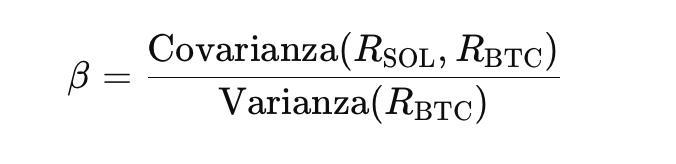

In [2]:
btc_data = yf.download("BTC-USD", start="2020-04-10")


[*********************100%***********************]  1 of 1 completed


In [ ]:
btc_data.head()

**Beta**

In [10]:
# calcolo del coefficiente Beta
btc_close = btc_data[["Adj Close"]].rename(columns={"Adj Close": "BTC_Adj_Close"})
sol_close = solana_data[["Adj Close"]].rename(columns={"Adj Close": "SOL_Adj_Close"})

# concatenazione dei due dataframe
df = pd.concat([btc_close, sol_close], axis=1)

# Calcolo dei rendimenti percentuali
df["BTC_Returns"] = df["BTC_Adj_Close"].pct_change()
df["SOL_Returns"] = df["SOL_Adj_Close"].pct_change()

# Rimuovere i valori NaN generati dal calcolo dei rendimenti
df = df.dropna()

# Calcolo della covarianza e della varianza
cov_matrix = np.cov(df["SOL_Returns"], df["BTC_Returns"])
cov_ri_rm = cov_matrix[0, 1]  # Covarianza tra i rendimenti di Solana e Bitcoin
var_rm = cov_matrix[1, 1]  # Varianza dei rendimenti di Bitcoin

# Calcolo del coefficiente Beta
beta = cov_ri_rm / var_rm

print(f"Coefficiente Beta di Solana rispetto a Bitcoin: {beta}")



Coefficiente Beta di Solana rispetto a Bitcoin: 1.0775235640417273


**Bande di Bollinger**

In [18]:

# Parametri per le Bande di Bollinger
n = 20  ## questo va impostato in base al periodo dell'analisi (adesso è 20gg)
k = 2  ## si imposta di solito a 2, perchè include circa il 95% dei movimenti dei prezzi


# Calcolare le Bande di Bollinger per Bitcoin
df["BTC_SMA"] = df["BTC_Adj_Close"].rolling(window=n).mean()
df["BTC_StdDev"] = df["BTC_Adj_Close"].rolling(window=n).std()
df["BTC_Upper_Band"] = df["BTC_SMA"] + k * df["BTC_StdDev"]
df["BTC_Lower_Band"] = df["BTC_SMA"] - k * df["BTC_StdDev"]

# Calcolare le Bande di Bollinger per Solana
df["SOL_SMA"] = df["SOL_Adj_Close"].rolling(window=n).mean()
df["SOL_StdDev"] = df["SOL_Adj_Close"].rolling(window=n).std()
df["SOL_Upper_Band"] = df["SOL_SMA"] + k * df["SOL_StdDev"]
df["SOL_Lower_Band"] = df["SOL_SMA"] - k * df["SOL_StdDev"]

# Visualizzazione semplice del risultato
bollinger_output = {
    "BTC_SMA": df["BTC_SMA"].dropna().iloc[-1],
    "BTC_Upper_Band": df["BTC_Upper_Band"].dropna().iloc[-1],
    "BTC_Lower_Band": df["BTC_Lower_Band"].dropna().iloc[-1],
    "SOL_SMA": df["SOL_SMA"].dropna().iloc[-1],
    "SOL_Upper_Band": df["SOL_Upper_Band"].dropna().iloc[-1],
    "SOL_Lower_Band": df["SOL_Lower_Band"].dropna().iloc[-1],
}

bollinger_output


{'BTC_SMA': 94445.9203125,
 'BTC_Upper_Band': 101206.45782190378,
 'BTC_Lower_Band': 87685.38280309623,
 'SOL_SMA': 236.85406494140625,
 'SOL_Upper_Band': 262.9088533625693,
 'SOL_Lower_Band': 210.7992765202432}

**Sharpe Ratio**

In [19]:
# Parametri
risk_free_rate = 0.02  # Tasso di rendimento privo di rischio (esempio 2% annuo)

# Calcolare i rendimenti giornalieri
df["BTC_Return"] = df["BTC_Adj_Close"].pct_change()
df["SOL_Return"] = df["SOL_Adj_Close"].pct_change()

# Rimuovere eventuali valori NaN
df = df.dropna()

# Calcolare il rendimento medio e la deviazione standard per Bitcoin
btc_mean_return = df["BTC_Return"].mean()
btc_std_dev = df["BTC_Return"].std()

# Calcolare il rendimento medio e la deviazione standard per Solana
sol_mean_return = df["SOL_Return"].mean()
sol_std_dev = df["SOL_Return"].std()

# Calcolare lo Sharpe Ratio per Bitcoin
btc_sharpe_ratio = (btc_mean_return - risk_free_rate) / btc_std_dev

# Calcolare lo Sharpe Ratio per Solana
sol_sharpe_ratio = (sol_mean_return - risk_free_rate) / sol_std_dev

# Risultati
sharpe_ratios = {
    "BTC_Sharpe_Ratio": btc_sharpe_ratio,
    "SOL_Sharpe_Ratio": sol_sharpe_ratio,
}

sharpe_ratios


{'BTC_Sharpe_Ratio': -0.5651206718107598,
 'SOL_Sharpe_Ratio': -0.21230871458814693}

In [ ]:
!git clone

In [20]:
!git commit -m "Calcolato tutti e tre gli indici sopra"

fatal: not a git repository (or any of the parent directories): .git
